In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import sys
sys.path.insert(0, '..')
from utils import *


In [2]:
def ants_preprocess(data):
    data_with_od = create_od_column(data, ['OriginCty', 'DestinationCty'])

    data_with_layover = calculate_total_layover_time(data_with_od, as_ratio=True)

    data_with_layover2 = calculate_distance_difference(data_with_layover, as_ratio=True)

    data_with_redirect_ratio = redirect_ratio(data_with_layover2)

    droped_values = drop_neg_layover_time(data_with_redirect_ratio)

    return droped_values


In [3]:
# rand_data = pd.read_csv('../raw_data/rand_200k_sample', low_memory=False, index_col='Unnamed: 0')
horz_data = pd.read_csv('../raw_data/all_data_60_horizon')


In [4]:
horz_data.dropna(subset=['OriginApt', 'DestinationCty'], inplace=True)


In [5]:
horz_data.isna().sum()


OriginApt                           0
OriginCty                           0
OriginCtry                        541
DestinationApt                      0
DestinationCty                      0
DestinationCtry                   336
TravelHorizonDays                   0
TravelDistanceKm                    0
SelfTransfer                        0
Stops                               0
DurationMin                         0
Seg_0_OriginIATA                    0
Seg_0_OriginName                    0
Seg_0_DestinationIATA               0
Seg_0_DestinationName               0
Seg_0_OperatingCarrierIATA     132585
Seg_0_TravelDistanceKm              0
Seg_1_OriginIATA              1405057
Seg_1_OriginName              1405057
Seg_1_DestinationIATA         1405057
Seg_1_DestinationName         1405057
Seg_1_OperatingCarrierIATA    1448276
Seg_1_TravelDistanceKm        1405057
Seg_2_OriginIATA              2319358
Seg_2_OriginName              2319358
Seg_2_DestinationIATA         2319358
Seg_2_Destin

# Using Log to get a new target

In [6]:
processed_data = ants_preprocess(horz_data)


<Axes: >

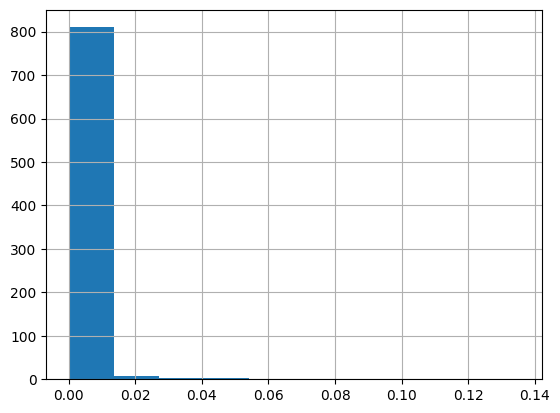

In [7]:
processed_data['ODRedirects'].value_counts(normalize=True).hist()


In [8]:
list_of_od = processed_data['OD'].unique()


In [9]:
for i in range(5,16):
    for o in list_of_od[:10]:
        mask = (processed_data['TravelHorizonDays'] == i) & (processed_data['OD'] == o)
        masked_data = processed_data[mask]
        if len(masked_data) == 0:
            pass
        else:
            print(masked_data['redirect_ratio'].min())


0.07692307692307693
0.5
0.5
0.16666666666666666
1.0
0.5
1.0
1.0
0.5
0.3333333333333333
1.0
1.0
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.3333333333333333
1.0
0.3333333333333333
1.0
0.5
0.5
1.0
1.0
1.0
0.25
0.5
1.0


In [10]:
processed_data['log_ODRedirects'] = np.log1p(processed_data['ODRedirects'])


In [11]:
processed_data


,OriginApt,OriginCty,OriginCtry,DestinationApt,DestinationCty,DestinationCtry,TravelHorizonDays,TravelDistanceKm,SelfTransfer,Stops,...,ItineraryRedirects,ODRedirects,OD,total_travel_time,total_layover_time,total_layover_time_ratio,total_distance_traveled,extra_travel_distance_ratio,redirect_ratio,log_ODRedirects
386,AAE,AAE,DZ,ORN,ORN,DZ,9,767.0,False,1,...,1,1,AAEORN,150.0,185.0,0.552239,772.0,1.006519,1.000000,0.693147
387,AAE,AAE,DZ,CDG,PAR,FR,2,1420.0,False,0,...,1,17,AAEPAR,145.0,0.0,0.000000,1420.0,1.000000,0.058824,2.890372
388,AAE,AAE,DZ,CDG,PAR,FR,2,1420.0,True,1,...,1,17,AAEPAR,180.0,270.0,0.600000,1420.0,1.000000,0.058824,2.890372
389,AAE,AAE,DZ,CDG,PAR,FR,2,1420.0,True,1,...,1,17,AAEPAR,175.0,225.0,0.562500,1428.0,1.005634,0.058824,2.890372
390,AAE,AAE,DZ,ORY,PAR,FR,2,1396.0,True,1,...,2,17,AAEPAR,165.0,80.0,0.326531,1396.0,1.000000,0.117647,2.890372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580499,ZUH,ZUH,CN,KMG,KMG,CN,5,1133.0,False,0,...,4,5,ZUHKMG,120.0,0.0,0.000000,1133.0,1.000000,0.800000,1.791759
2580500,ZUH,ZUH,CN,KOW,KOW,CN,21,461.0,False,0,...,1,1,ZUHKOW,80.0,0.0,0.000000,461.0,1.000000,1.000000,0.693147
2580501,ZYL,ZYL,BD,MAN,MAN,GB,7,8070.0,False,0,...,5,5,ZYLMAN,690.0,0.0,0.000000,8070.0,1.000000,1.000000,1.791759
2580502,ZYL,ZYL,BD,MAN,MAN,GB,17,8070.0,True,3,...,1,3,ZYLMAN,860.0,495.0,0.365314,9428.0,1.168278,0.333333,1.386294


<Axes: >

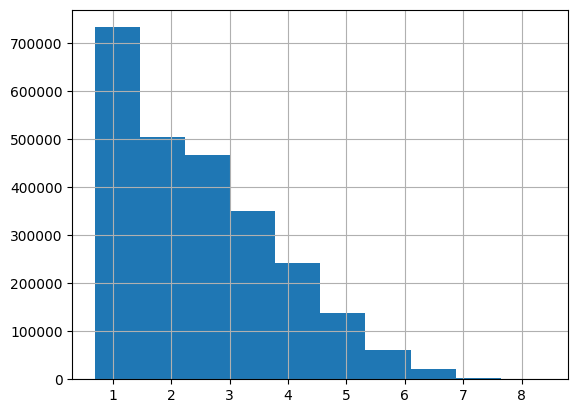

In [12]:
processed_data['log_ODRedirects'].hist()


In [13]:
processed_data['weighted_redirect_ratio'] = processed_data['redirect_ratio'] * processed_data['log_ODRedirects']


In [14]:
processed_data['lod_od_by_itredirect'] = processed_data['ItineraryRedirects'] * processed_data['log_ODRedirects']


In [15]:
processed_data['weighted_redirect_ratio'].describe()


count    2.521085e+06
mean     5.881212e-01
std      4.742786e-01
min      1.866057e-03
25%      2.397895e-01
50%      4.907398e-01
75%      6.931472e-01
max      6.392469e+00
Name: weighted_redirect_ratio, dtype: float64

<Axes: >

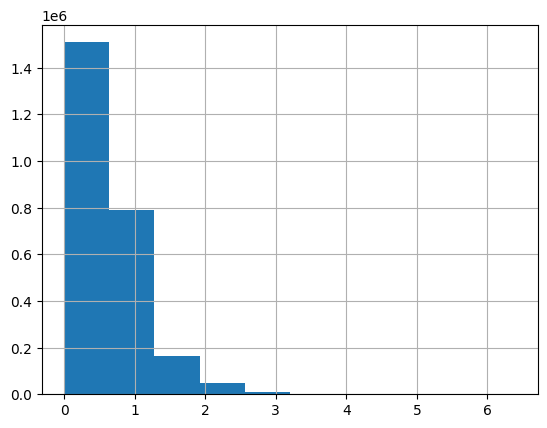

In [16]:
processed_data['weighted_redirect_ratio'].hist()


In [17]:
processed_data['lod_od_by_itredirect'].describe()


count    2.521085e+06
mean     1.109730e+01
std      3.959892e+01
min      6.931472e-01
25%      1.609438e+00
50%      3.401197e+00
75%      8.409385e+00
max      7.101460e+03
Name: lod_od_by_itredirect, dtype: float64

In [18]:
columns = ['Stops','DurationMin', 'total_layover_time_ratio', 'OriginApt', 'DestinationApt',
            'total_distance_traveled','extra_travel_distance_ratio', 'TravelHorizonDays',
            'ItineraryRedirects', 'ODRedirects', 'redirect_ratio', 'lod_od_by_itredirect']


In [19]:
processed_data['lod_od_by_itredirect'].describe()


count    2.521085e+06
mean     1.109730e+01
std      3.959892e+01
min      6.931472e-01
25%      1.609438e+00
50%      3.401197e+00
75%      8.409385e+00
max      7.101460e+03
Name: lod_od_by_itredirect, dtype: float64

In [20]:
processed_data['lod_od_by_itredirect'].quantile(0.80)


10.912758479179157

In [21]:
smaller_df = processed_data[columns]


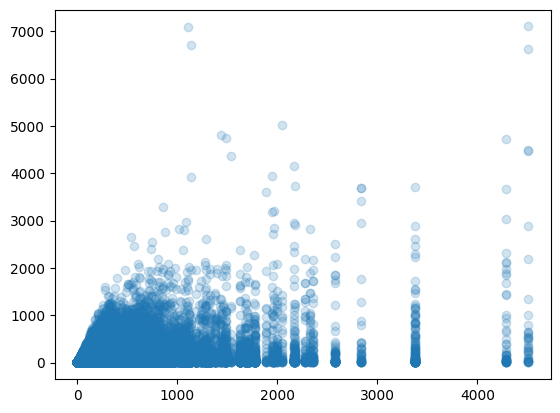

In [22]:
plt.scatter(processed_data['ODRedirects'], processed_data['lod_od_by_itredirect'], alpha=0.2)


<Axes: xlabel='ODRedirects', ylabel='lod_od_by_itredirect'>

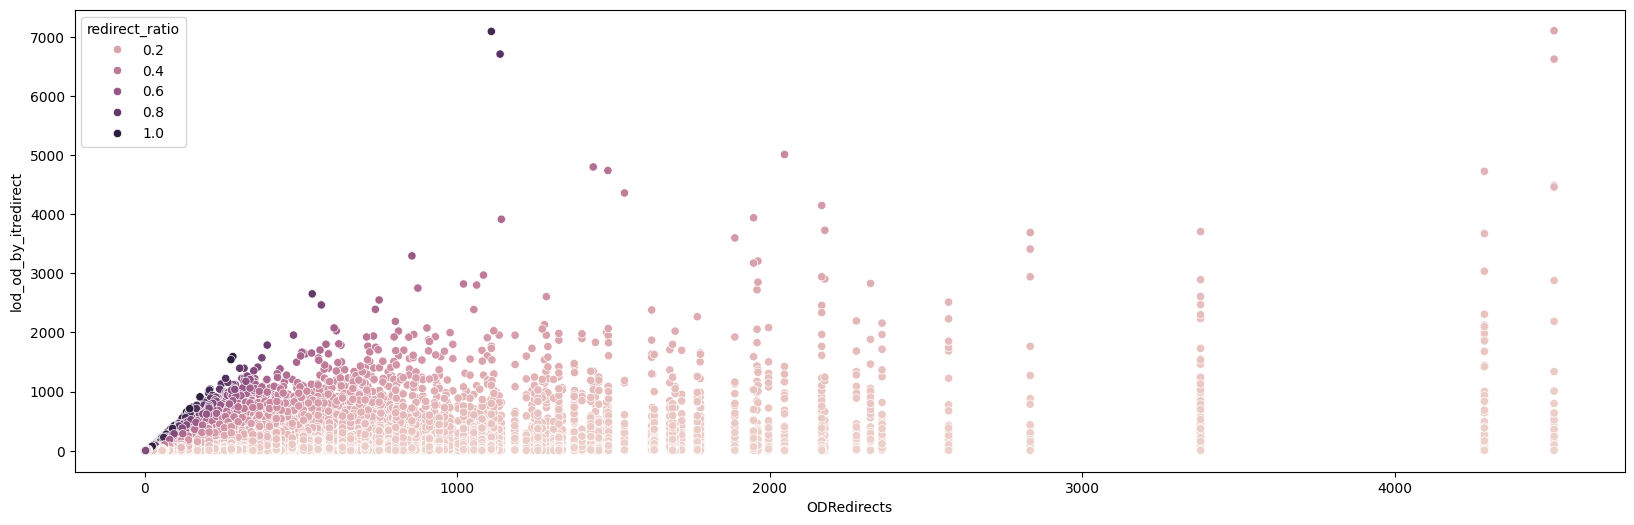

In [23]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.scatterplot(processed_data, x='ODRedirects', y='lod_od_by_itredirect', hue='redirect_ratio')


In [24]:
model_columns = ['Stops','DurationMin', 'total_layover_time_ratio', 'OriginApt', 'DestinationApt',
            'extra_travel_distance_ratio', 'TravelHorizonDays', 'TravelDistanceKm',
            'lod_od_by_itredirect']


In [25]:
model_data = processed_data[model_columns]


In [26]:
model_data['TravelDistanceKm'].describe()


count    2.521085e+06
mean     3.358091e+03
std      3.361634e+03
min      1.300000e+01
25%      1.029000e+03
50%      1.935000e+03
75%      4.613000e+03
max      1.994100e+04
Name: TravelDistanceKm, dtype: float64

In [27]:
import category_encoders as ce
from scipy import stats

from sklearn.preprocessing import MinMaxScaler


In [28]:
o_encoder = ce.BinaryEncoder(cols=['OriginApt'])
df_binary = o_encoder.fit_transform(model_data)

d_encoder = ce.BinaryEncoder(cols=['DestinationApt'])
all_binary = d_encoder.fit_transform(df_binary)


In [29]:
box_cox_columns = ['DurationMin', 'TravelDistanceKm','extra_travel_distance_ratio']

yeo_johnson_columns = ['total_layover_time_ratio']

min_max_scaling = ['TravelHorizonDays','Stops']


In [30]:
for col in box_cox_columns:
    data = all_binary[col].values

    all_binary[col], best_lambda = stats.boxcox(all_binary[col])


In [31]:
for col in yeo_johnson_columns:
    data = all_binary[col].values

    all_binary[col], lambda_yj = stats.yeojohnson(all_binary[col])


In [32]:
minmax_train_scaler = MinMaxScaler()
all_binary[min_max_scaling] = minmax_train_scaler.fit_transform(all_binary[min_max_scaling])


In [33]:
all_binary.isna().sum()


Stops                          0
DurationMin                    0
total_layover_time_ratio       0
OriginApt_0                    0
OriginApt_1                    0
OriginApt_2                    0
OriginApt_3                    0
OriginApt_4                    0
OriginApt_5                    0
OriginApt_6                    0
OriginApt_7                    0
OriginApt_8                    0
OriginApt_9                    0
OriginApt_10                   0
OriginApt_11                   0
DestinationApt_0               0
DestinationApt_1               0
DestinationApt_2               0
DestinationApt_3               0
DestinationApt_4               0
DestinationApt_5               0
DestinationApt_6               0
DestinationApt_7               0
DestinationApt_8               0
DestinationApt_9               0
DestinationApt_10              0
DestinationApt_11              0
extra_travel_distance_ratio    0
TravelHorizonDays              0
TravelDistanceKm               0
lod_od_by_

In [34]:
from sklearn.neighbors import KNeighborsRegressor


In [35]:
X_train, X_test, y_train, y_test = train_test_split(all_binary.drop('lod_od_by_itredirect',
                                                                                axis=1), all_binary['lod_od_by_itredirect'], random_state=42)

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(processed_data.drop('lod_od_by_itredirect',
                                                                                axis=1), processed_data['lod_od_by_itredirect'], random_state=42)


In [36]:
k = 50
knn_50 = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
knn_50.fit(X_train, y_train)


KNeighborsRegressor(n_jobs=-1, n_neighbors=50)

In [37]:
y_pred_knn = knn_50.predict(X_test)


In [38]:
from sklearn.metrics import r2_score


In [39]:
r2_score(y_true=y_test, y_pred=y_pred_knn)


0.2315027979806904

In [40]:
knn_50_performance_df = pd.DataFrame({'true_value':y_test, 'pred_value':y_pred_knn, 'DurationMin':X_test['DurationMin'],
                                  "ODRedirects":X_test_all['ODRedirects'], "ItineraryRedirects":X_test_all['ItineraryRedirects'],
                                  'Stops':X_test_all['Stops']})

knn_50_performance_df['difference'] = knn_50_performance_df['pred_value'] - knn_50_performance_df['true_value']


<Axes: xlabel='ODRedirects', ylabel='difference'>

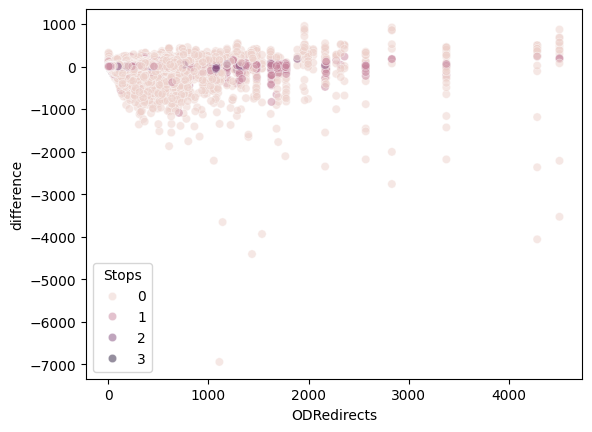

In [41]:
sns.scatterplot(knn_50_performance_df, x='ODRedirects', y='difference', alpha=0.5, hue='Stops')


# Using ranking as a new target - ABANDONED

In [5]:
# horz_data

# processed_data = ants_preprocess(horz_data)

# processed_data['TravelHorizonDays'].hist()

# len(processed_data['OD'].unique())

# for i  in range(1, 31):


,OriginApt,OriginCty,OriginCtry,DestinationApt,DestinationCty,DestinationCtry,TravelHorizonDays,TravelDistanceKm,SelfTransfer,Stops,...,Seg_1_DurationMin,Seg_2_DurationMin,Seg_3_DurationMin,passengers,SearchLowestRatio,ItinLowestRatio,Price,PricePerPax,ItineraryRedirects,ODRedirects
386,AAE,AAE,DZ,ORN,ORN,DZ,9,767.0,False,1,...,75.0,NaN,NaN,2,1.077042,1.077042,106.500,53.2500,1,1
387,AAE,AAE,DZ,CDG,PAR,FR,2,1420.0,False,0,...,NaN,NaN,NaN,1,1.000000,1.000000,129.775,129.7750,1,17
388,AAE,AAE,DZ,CDG,PAR,FR,2,1420.0,True,1,...,90.0,NaN,NaN,1,1.602140,1.000000,820.020,820.0200,1,17
389,AAE,AAE,DZ,CDG,PAR,FR,2,1420.0,True,1,...,70.0,NaN,NaN,1,1.040085,1.000000,534.650,534.6500,1,17
390,AAE,AAE,DZ,ORY,PAR,FR,2,1396.0,True,1,...,80.0,NaN,NaN,2,1.159297,1.000000,677.820,677.8200,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580499,ZUH,ZUH,CN,KMG,KMG,CN,5,1133.0,False,0,...,NaN,NaN,NaN,8,1.635305,1.000000,250.530,125.2675,4,5
2580500,ZUH,ZUH,CN,KOW,KOW,CN,21,461.0,False,0,...,NaN,NaN,NaN,1,1.000000,1.000000,52.195,52.1950,1,1
2580501,ZYL,ZYL,BD,MAN,MAN,GB,7,8070.0,False,0,...,NaN,NaN,NaN,5,1.428703,1.000000,716.563,716.5630,5,5
2580502,ZYL,ZYL,BD,MAN,MAN,GB,17,8070.0,True,3,...,340.0,380.0,85.0,2,1.005772,1.000000,1774.890,887.4400,1,3
